In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl

import os, sys
rootpath = os.path.join(os.getcwd(), '..')
codepath = os.path.join(os.getcwd(), '../codebase') #directory where you have the class file
sys.path.append(rootpath)
sys.path.append(codepath)
from codebase.FHN_model import * 
from codebase.FHN_analysis import * 



mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False


projectfolder = '../figures/' #directory where you want to store your figures
simulation_name = 'trial'
mpl.rcParams.update({'font.size': 16})

In [2]:
#initialisation of the model
model = FHN_model(N=200, 
                  a=3, 
                  
                 e=0.01, 
                 random_key=jr.PRNGKey(0), 
                 organ='heart',
                 p=0.5,

                 Laplacian_seed=1000,
                 stimulus_time=1300)             

In [3]:
model.L

BCSR(float32[40000, 40000], nse=98337)

In [7]:
model.solve_with_EulerMaruyama_fori(output_times=3000)

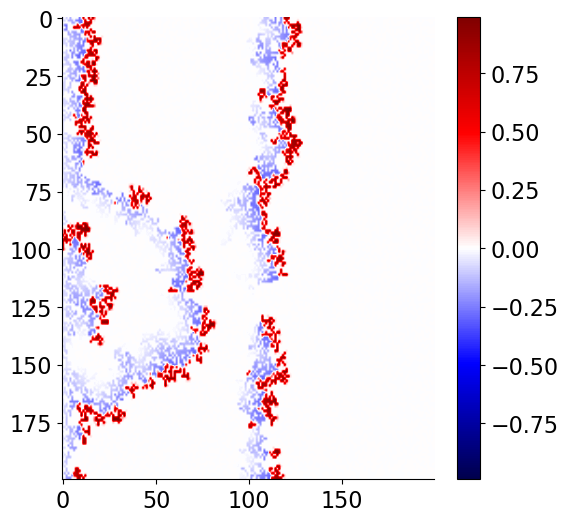

In [8]:


fig, ax = plt.subplots(figsize=(6, 6), facecolor='none') 
#array=u_solutions_loaded[2,:,:] 
array=model.vs.T
# Display the first frame
array=array.reshape(200,200,-1)
img = ax.imshow(array[:,:,1500], cmap="seismic", interpolation="bilinear", vmin=-np.max(np.abs(array)), vmax=np.max(np.abs(array)), aspect='auto')
#plt.axis("off")
	
# Add a colorbar with specific ticks
cbar = fig.colorbar(img, ax=ax)
ax.set_aspect('auto')
#ax.spines['left'].set_visible(False) 
#ax.spines['bottom'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False) 
#cbar.set_label('V', rotation=0, labelpad=15, fontsize=12, color='black')
#ax.set_xticks([])  # Remove x-axis ticks
#ax.set_yticks([])  

#fig.savefig('figures/heart_snapshot_0=0.3.png', facecolor='none', bbox_inches='tight', pad_inches=0)
    

In [6]:
array.shape

(200, 200, 3000)

In [4]:
analysis= FHN_analyzer(model)

In [5]:
analysis.kuramoto()

In [6]:
analysis.entropy_calculation()

In [7]:
analysis.coherence()

In [8]:
analysis.R_V

Array(0.10294084, dtype=float32)